# Simple Forecasting Methods
==============================================

In this notebook we document some simple forecasting techniques that are used to generate a prediction of future trends in Time Series. This notebook will demonstrate techniques like:
- Naive Forecasting
- Average Method
- Drift Method
-------------------------------


### Note: Data for AAPL stock has been taken. 

We take a quick look at the structure of the data.

In [1]:
library(ggplot2)
library(repr)

In [2]:
AAPL <- read.csv(file="/home/docboy/Desktop/5th Year/Jupyter Notebooks/nb_data/AAPL.csv")
head(AAPL)

Date,Open,High,Low,Close,Adj.Close,Volume
2019-02-13,171.39,172.48,169.92,170.18,169.5271,22490200
2019-02-14,169.71,171.26,169.38,170.80,170.1448,21835700
2019-02-15,171.25,171.70,169.75,170.42,169.7662,24626800
2019-02-19,169.71,171.44,169.49,170.93,170.2743,18972800
2019-02-20,171.19,173.32,170.99,172.03,171.3701,26114400
2019-02-21,171.80,172.37,170.30,171.06,170.4038,17249700


In [3]:
length(AAPL[,1])

[1] 60

---------------------------------

The data taken has a total of 60 data points. We will only consider the closing price for AAPL as our input time series. We now extract the "Close" column from the data and plot it.

In [4]:
data <- subset(AAPL, select = c("Date", "Close"))
head(data)

Date,Close
2019-02-13,170.18
2019-02-14,170.80
2019-02-15,170.42
2019-02-19,170.93
2019-02-20,172.03
2019-02-21,171.06


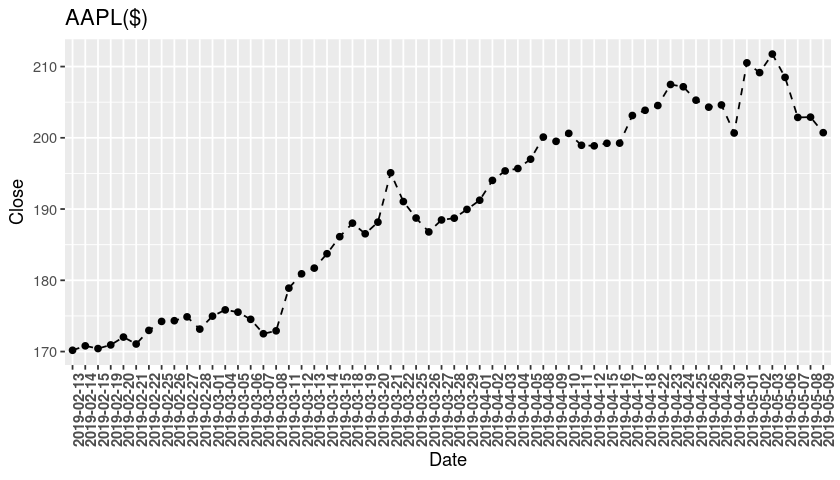

In [5]:
options(repr.plot.width = 7, repr.plot.height = 4)
ggplot(data = data, aes(x = Date, y = Close, group = 1)) + geom_line(linetype = "dashed") + 
    geom_point() + theme(axis.text.x = element_text(face = "bold", angle = 90)) + ggtitle("AAPL($)")

-----------------------------------

## Naive Method

This method is extremely simple, but unreliable. The naive methods relies on the assumption that the next step in the time series is the same as the previous step. i.e:
$$ \; \; \; \;\; \; y_{t+1} = y_t $$ thus giving us;
$$=>y_{t+h} = y_t $$
As is apparent, this method is inefficient when making long range forecasts. An R implementation of this is given below.



In [6]:
# We define a function for Naive prediction.
naive_pred <- function(y, h){
    size <- dim(y)
    value <- size[1]
   
    # Extract the price values
    y_val = y[,2]
    k = c()
    
    for (i in 1:h) {
        k[i] = y[value, 2]        
    }
    y_val <- append(y_val, k)
    return (y_val)
}

We use the function defined for h = 5.

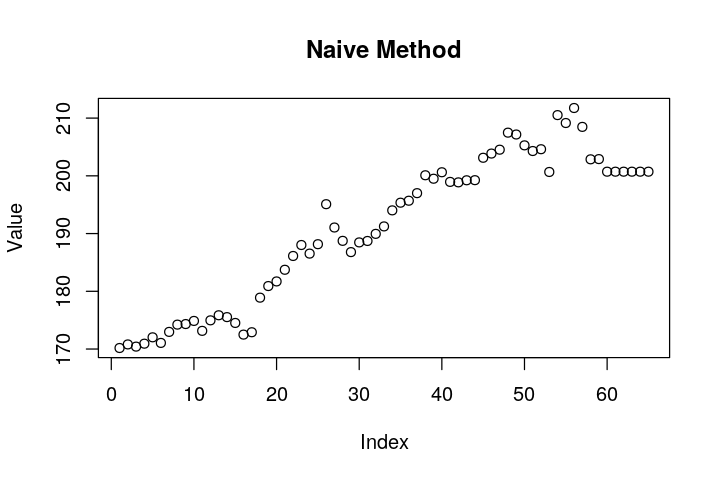

In [7]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(naive_pred(data, 5), ylab = "Value", main = "Naive Method")

It can be seen that "naive" method is not apt for long term forecasts. 

----------------------------------

## Average Method 

In this method we simply take the average of the past values and use it to obtain the forecast for the future *h* values. Simply put; 
$$y_{t+h} = \frac{\sum{y_i}}{T}$$.

This method too, is unreliable.
An R implementation of this is given below. 

In [8]:
# We define a function for Average prediction.
avg_pred <- function(y, h){
    
    size <- dim(y)
    
    # Extract the price values
    y_val = y[,2]
    val = sum(y_val)/size[1]
    
    q <- c()
    for (i in 1:h) {
        q[i] = val     
    }
    y_val <- append(y_val, q)
    return (y_val)
}

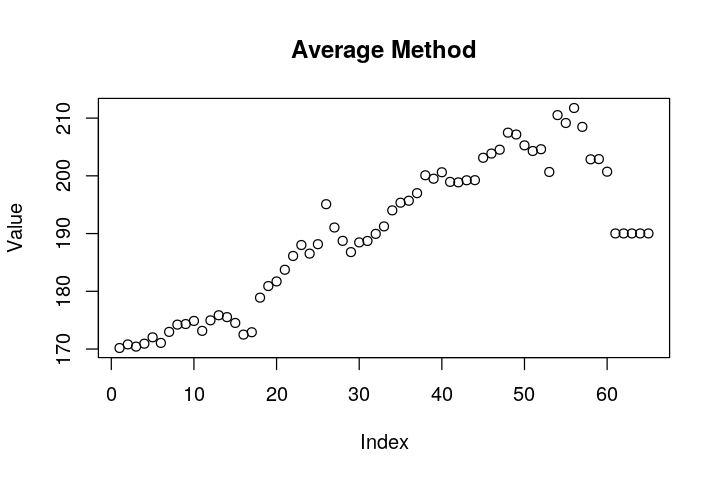

In [9]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(avg_pred(data, 5), ylab = "Value", main = "Average Method")

In this case, we observe that using the average of the previous values gives us a lower forecast value than the naive method. 

------------------------------------

## Drift Method

A variation on the naive method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data. 

The forecast for *t+h* is given by:
$$y_{t+h} = y_t + h\bigg(\frac{y_t - y_1}{T-1} \bigg)$$

This is equivalent to drawing a line between the first and the last points of the time series and maintaining the trend. The R implementation of this is shown below. 

In [10]:
# We define a function for Drift prediction.
drift_pred <- function(y, h){
    
    size <- dim(y)
    
    # Extract the price values
    y_val = y[,2]
    value = y_val[size[1]]
    
    q <- c()
    for (i in 1:h) {
        # Define the equation of the line
        pred = value + h*((value - y_val[1])/(size[1] - 1))
        q[i] = pred
        value = pred
    }
    y_val <- append(y_val, q)
    return (y_val)
}

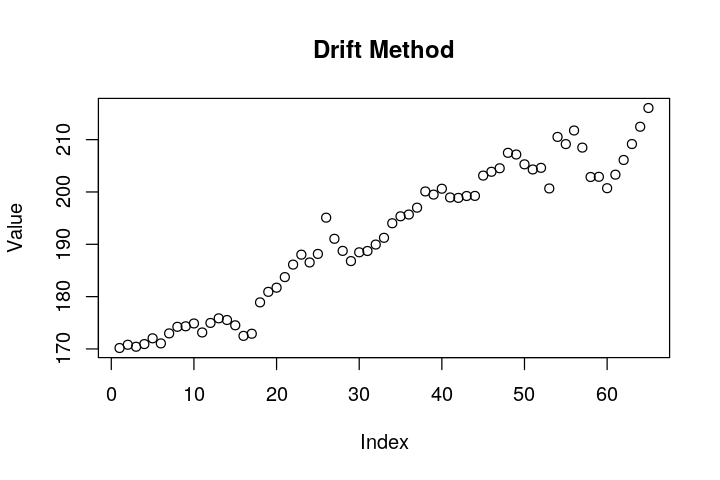

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(drift_pred(data, 5), ylab = "Value", main = "Drift Method")

____________________

## Concluding Note

In this notebook we have demonstrated some really simple methods to forecast a given time series. Advanced methods like AR, MA, ARMA etc will be demonstrated in another notebook.


### References
1. Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice, 2nd edition, OTexts: Melbourne, Australia. 
